# Read in the data from Charles El Mir and output to "raw"

*The data are from [this article](https://www.sciencedirect.com/science/article/pii/S001910351830349X?via%3Dihub).*

*I will have to downsample considerably...*


In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import os
import csv

from matplotlib import pyplot as plt
from matplotlib import animation
from ipywidgets import *

### Get the total number of objects in all files

*The number of particles decreases as the time increases, but it's always around 1M.  We want about 1M objects total.  So the fraction that we will use in each file is about 1/Nfiles.*

In [2]:
fs = os.listdir()
files = []
nfiles = 0
for f in fs:
    if ('csv' in f):
        files.append(f)
#print(files)
nfiles = len(files)
frac = 2./nfiles #* 0.1 #to speed up everything for testing
print(frac)        


0.014925373134328358


### Grab a list of IDs from the first file

In [3]:
f = 'grav.000000000.csv'
df = pd.read_csv(f, header=None, names=['ID','x','y','z','color','damage'])
time = float(f[5:14])
df['time'] = time
dfSample = df.sample(frac=frac)
print(dfSample.shape)
print(dfSample)

(15177, 7)
              ID             x             y             z  color    damage  \
879303  879303.0  10500.011188   3700.003942    100.000107    3.0  0.133266   
50836    50836.0  -6900.007352  -9900.010548   2700.002877    3.0  0.143694   
350461  350461.0  -3300.003516  -5100.005434    300.000320    5.0  0.152429   
96762    96762.0  -8500.009057   2500.002664  -5900.006286    3.0  0.136452   
270231  270231.0  -5300.005647   8100.008630   6500.006926    2.0  0.180558   
425149  425149.0  -1900.002024    300.000320 -11300.012040    3.0  0.136878   
422375  422375.0   1900.002024   -300.000320 -11700.012466    3.0  0.128038   
989842  989842.0   5100.005434   5700.006073   2300.002451    2.0  0.200000   
819668  819668.0   4300.004582   -900.000959  -8500.009057    3.0  0.129235   
755242  755242.0   5700.006073  -9100.009696  -4100.004368    3.0  0.131411   
812846  812846.0   4300.004582   -500.000533 -10300.010974    3.0  0.128677   
402419  402419.0    300.000320  -7100.007

### Read through all the files, and only keep the rows that match these IDs

In [4]:
dfOut = dfSample.copy()
for i,f in enumerate(files):
    if (i > 0):
        df = pd.read_csv(f, header=None, names=['ID','x','y','z','color','damage'])
        time = float(f[5:14])
        df['time'] = time
        dfUse = df.loc[df['ID'].isin(dfSample['ID'].values)] 
        dfOut = dfOut.append(dfUse, ignore_index=True)
        print(f, dfOut.shape, dfUse.shape)

grav.000001000.csv (30344, 7) (15167, 7)
grav.000002000.csv (45498, 7) (15154, 7)
grav.000003000.csv (60640, 7) (15142, 7)
grav.000004000.csv (75762, 7) (15122, 7)
grav.000005000.csv (90854, 7) (15092, 7)
grav.000006000.csv (105903, 7) (15049, 7)
grav.000007000.csv (120907, 7) (15004, 7)
grav.000008000.csv (135853, 7) (14946, 7)
grav.000009000.csv (150724, 7) (14871, 7)
grav.000010000.csv (165490, 7) (14766, 7)
grav.000011000.csv (180137, 7) (14647, 7)
grav.000012000.csv (194695, 7) (14558, 7)
grav.000013000.csv (209142, 7) (14447, 7)
grav.000014000.csv (223482, 7) (14340, 7)
grav.000015000.csv (237710, 7) (14228, 7)
grav.000016000.csv (251846, 7) (14136, 7)
grav.000017000.csv (265899, 7) (14053, 7)
grav.000018000.csv (279862, 7) (13963, 7)
grav.000019000.csv (293753, 7) (13891, 7)
grav.000020000.csv (307591, 7) (13838, 7)
grav.000021000.csv (321392, 7) (13801, 7)
grav.000022000.csv (335146, 7) (13754, 7)
grav.000023000.csv (348850, 7) (13704, 7)
grav.000024000.csv (362513, 7) (13663, 

## Write to "raw" file

*This is extremely slow because I want to match the IDs*

In [5]:
dt = 1000.
csvfile = open("asteroid.raw", 'wt')
csvwriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
for i in range(len(dfOut['ID'])):
    ID = dfOut['ID'].values[i]
    sameID = dfOut.loc[(dfOut['ID'] == ID) & (dfOut.index > i)]
    r,c = sameID.shape

    if (r > 0):
        if (dfOut['time'].values[i] - sameID['time'].values[0] <= dt):
            csvwriter.writerow([dfOut['x'].values[i],dfOut['y'].values[i],dfOut['z'].values[i], 
                            sameID['x'].values[0],sameID['y'].values[0],sameID['z'].values[0],
                            dfOut['time'].values[i], dfOut['damage'].values[i], dfOut['ID'].values[i]])
csvfile.close()

## Plot the files

<IPython.core.display.Javascript object>


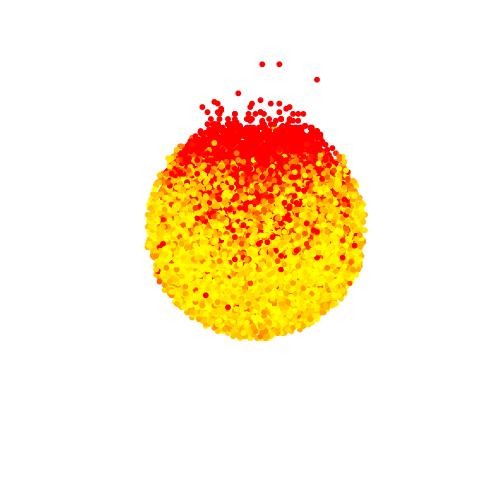

interactive(children=(FloatSlider(value=0.0, description='t', max=133000.0), Output()), _dom_classes=('widget-…

<function __main__.update_plot(t=0)>

In [8]:
df = pd.read_csv('../data/asteroid.raw', delimiter=' ', header=None, names=['x1','y1','z1','x2','y2','z2','time','damage','id'])
times = np.sort(np.array(list(set(df['time'].values))))
dt = np.diff(times)[0]
#print(times)
#print(dt)

dfUse = df.loc[df['time'].values == times[0]]

fig,ax = plt.subplots(figsize=(5,5))
scat = ax.scatter(dfUse['x1'].values, dfUse['y1'].values, s=10, 
                c=dfUse['damage'].values, cmap='autumn_r', vmin=0.125, vmax = 0.2)
ax.set_xlim(-20000, 20000)
ax.set_ylim(-25000, 20000)
ax.set_aspect('equal')
plt.axis('off')


def update_plot(t=0):
    
    tFrac = (t % dt)/dt
    dfUse = df.loc[(df['time'].values >= t) & (df['time'].values < t+dt)]
    x = dfUse['x1'].values + (dfUse['x2'].values - dfUse['x1'].values)*tFrac
    y = dfUse['y1'].values + (dfUse['y2'].values - dfUse['y1'].values)*tFrac
    # Change the colors.
    scat.set_array(dfUse['damage'].values)
    # Change the x,y positions. This expects a _single_ 2xN, 2D array
    scat.set_offsets(np.c_[x,y])
    #fig.canvas.draw()
    return scat,

interact(update_plot, t = widgets.FloatSlider(value=0, min=min(times),max=max(times),step=0.1))



0.12500027167900002 0.2


<IPython.core.display.Javascript object>


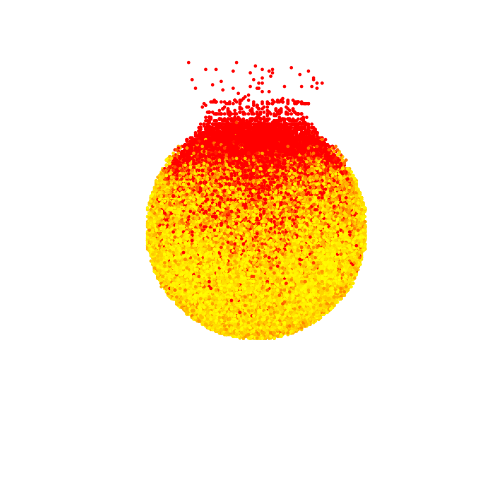

(-20000.0, 20000.0, -25000.0, 20000.0)

In [7]:
i=0
f = files[i]
#f = 'grav.000000000.csv'
#f = 'grav.000092000.csv'
df = pd.read_csv(f, header=None, names=['ID','x','y','z','color','damage'])
dfUse = df.sample(frac = 0.1)
print(min(dfUse['damage'].values), max(dfUse['damage'].values))
fig,ax = plt.subplots(figsize=(5,5))
scat = ax.scatter(dfUse['x'].values, dfUse['y'].values, s=2, 
                  c=dfUse['damage'].values, cmap='autumn_r', vmin=0.125, vmax = 0.2)
ax.set_xlim(-20000, 20000)
ax.set_ylim(-25000, 20000)
ax.set_aspect('equal')
ax.axis('off')